In [314]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [315]:
stock_data =pd.read_csv("C:/Users/ASUS/Desktop/minor project/FTT-USD_2.csv", parse_dates=['Date'])
# stock_data.sort_values('Open', ascending=True)

In [316]:
# missing = stock_data[stock_data.isnull().any(axis = 1)]
# stock_data = stock_data.dropna(axis = 0)
# stock_data.reset_index(drop = True)

In [317]:
# stock_data = stock_data.iloc[6000:6750,:-1]
# stock_data.head()

In [318]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [319]:
X1 = np.array(stock_data['Open']) 
y1 = np.array(stock_data['Close']) 
# print(type(X))
X1 = X1.reshape(-1,1)
y1 = y1.reshape(-1,1)
print(X1.min())
# scalar.fit(X1)
# X = scalar.transform(X1)
# scalar.fit(y1)
# y = scalar.transform(y1)


22.410303


In [320]:
X = X1
y = y1

In [321]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

In [323]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


Polynomial Regression Model

In [324]:
degree = 4
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [325]:
y_predict_train = poly_reg.predict(X_train)
y_predict = poly_reg.predict(X_test)
y_predict.shape

(65, 1)

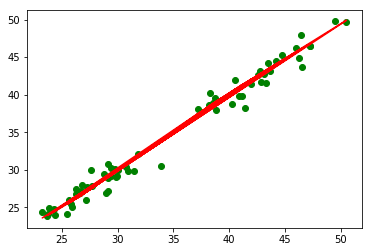

In [326]:
plt.scatter(X_test, y_test, color ='green', marker= 'o')
plt.plot(X_test, y_predict, color = 'red')

OR

In [327]:
# poly_reg = PolynomialFeatures(4)
# X_train_poly = poly_reg.fit_transform(X_train)
# poly_reg.fit(X_train_poly, y)
# reg_2 = LinearRegression()
# reg_2.fit(X_train_poly,y_train)
# y_predict_train = reg_2.predict(poly_reg.fit_transform(X_train))
# y_predict = reg_2.predict(poly_reg.fit_transform(X_test))

In [328]:
# plt.scatter(X_test, y_test, color = 'green')
# plt.plot(X_test, reg_2.predict(poly_reg.fit_transform(X_test)),color ='red')

In [329]:
# plt.scatter(X_train, y_train, color = 'green')
# plt.plot(X_train, reg_2.predict(poly_reg.fit_transform(X_train)), color = 'red')

Error calculation (Mean Squared Error)

In [330]:
# y_predict = poly_reg.predict(X_test)
print(f"mean_squared_error(train) in polynomial regression model ==>{mean_squared_error(y_train,y_predict_train)}")
print(f"mean_squared_error(test) in polynomial regression model ==>{mean_squared_error(y_test, y_predict)}")

mean_squared_error(train) in polynomial regression model ==>1.9501624049308366
mean_squared_error(test) in polynomial regression model ==>1.3594702425856606


In [331]:
b = 22.0
a = np.array([[22.0]])
a[:, np.newaxis]
a.reshape(-1,1)
a.shape


(1, 1)

In [332]:
poly_reg.predict(a)

array([[22.75914646]])

In [333]:
scalar.fit(X1)
a = scalar.transform(a)
a



array([[-0.01388316]])

In [334]:
Xs = poly_reg.predict(a)
X1.min()

22.410303

Xscaled = (X - X.min())/(X.max()-X.min())

In [335]:
Xp =  Xs *(X1.max() - X1.max()) +X1.min()
Xp

array([[22.410303]])